In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
merged_path = './merged_lexicon.csv'
merged = pd.read_csv(merged_path)  
test_path = './Data/olid-test.csv'
test = pd.read_csv(test_path)  
pd.set_option('display.max_colwidth', None)

# Design a (simple) lexicon-lookup approach

In [3]:
merged

,unit,hate-label
0,%e2%80%99ndrangheta,0
1,'ndrangheta,0
2,"(0, 0, 0)",1
3,(to get) dumped,0
4,(white) trash,0
...,...,...
12465,👮,0
12466,👶,1
12467,💢,1
12468,🚻,1


In [4]:
test.head()

,id,text,labels
0,15923,"#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL",1
1,27014,"#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.",0
2,30530,"#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER @USER @USER @USER @USER #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER First, it reduces the ca URL",0
3,13876,#Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL,0
4,60133,#NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL,1


In [5]:
# The string you want to check for
target_string = 'hated'

# Check if 'target_string' is in 'column_name' and get True or False
result = merged['unit'].str.contains(target_string).any()

print(result)

True


# Run this approach with the 4 lexicons

In [6]:
# Load the merged lexicon (from Step 3)
merged_lexicon = pd.read_csv('./merged_lexicon.csv')
# Drop instances where 'hate-label' is equal to 0
merged_lexicon = merged_lexicon[merged_lexicon['hate-label'] != 0]

# Load the OLID test dataset
test_data = pd.read_csv('./Data/olid-test.csv')


In [7]:
type(test_data['text'])

pandas.core.series.Series

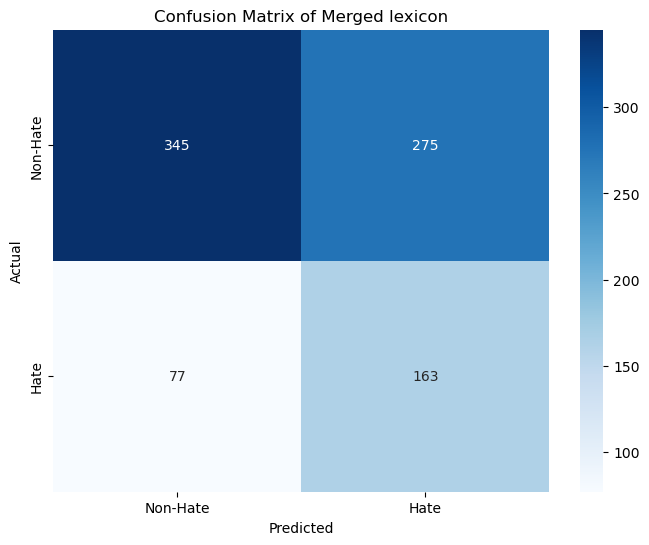

NameError: name 'classification_report' is not defined

In [8]:
def lexicon_lookup_and_evaluate(text_column, labels_column, lexicon, colum_name=None, name=None):
    """
    Perform lexicon-based hate speech identification and evaluate the results.

    Parameters:
        text_column (pd.Series): The column containing the input text to classify.
        labels_column (pd.Series): The column containing the true labels (0 for non-hate, 1 for hate).
        lexicon (pd.DataFrame): The merged lexicon containing hate speech terms and labels.
        colum_name (str) : the colume name in the dataframe 
        name (str) : name to be add it to Confusion Matrix


    Returns:
        pd.DataFrame: A DataFrame containing the original text, true labels, predicted labels, and the confusion matrix.
    """
    # Create a DataFrame to store results
    results_df = pd.DataFrame({'Text': text_column, 'True_Labels': labels_column})

    # Define a function for lexicon-based hate speech identification
    def lexicon_lookup(text, lexicon):
        tokens = text.lower().split()  # Convert to lowercase for case-insensitive matching
        for token in tokens:
            if token in lexicon[colum_name].values:
                return 1  # Hate speech detected
        return 0  # Non-hate speech

    # Apply the lexicon-lookup approach to the text data
    results_df['Predicted_Labels'] = text_column.apply(lambda x: lexicon_lookup(x, lexicon))

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(results_df['True_Labels'], results_df['Predicted_Labels'])

    # Create a confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Hate', 'Hate'],
                yticklabels=['Non-Hate', 'Hate'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of '+name)
    plt.show()
    
    # Generate a classification report
    report = classification_report(results_df['True_Labels'], results_df['Predicted_Labels'], target_names=['Non-Hate', 'Hate'])

    # Print the classification report
    print("Classification Report for " + name + ":\n")
    print(report)

    return results_df


lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], merged_lexicon, colum_name='unit', name = "Merged lexicon")


In [ ]:
# Define the path to the base lexicon file
path = r"../Assignment 3 - Group 11/Data/lexicon-of-abusive-words-master/Lexicons/"

featur_base_lexicon_path = path + "expandedLexicon.txt"
df_featur_base_lexicon = pd.read_csv(featur_base_lexicon_path, sep='\t', header=None, names=["word", "label"], encoding="utf-8")
df_featur_base_lexicon.head()

# Drop instances where 'label' is less than or equal to 0
df_featur_base_lexicon = df_featur_base_lexicon[df_featur_base_lexicon['label'] > 0]
df_featur_base_lexicon.head()

In [ ]:
lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], df_featur_base_lexicon , colum_name='word', name = "Expanded Lexicon")


In [ ]:
path= r"../Assignment 3 - Group 11/Data/"
hurtlex_EN = path+"hurtlex_EN.tsv"

# Read the TSV file into a DataFrame
df_hurtlex_EN = pd.read_csv(hurtlex_EN, sep='\t', encoding='utf-8')
df_hurtlex_EN.head()

In [ ]:
lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], df_hurtlex_EN , colum_name='lemma', name = "Hurtlex Lexicon")


In [ ]:
path= r"../Assignment 3 - Group 11/Data/"
mol =path+"mol.csv"

# Read the csv file into a DataFrame
df_mol = pd.read_csv(mol)

# Drop rows where en-hate-label is equal to 1
df_mol = df_mol[df_mol['en-hate-label'] != 1]

# Display the first few rows
df_mol.head()

In [ ]:
lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], df_mol , colum_name='en-american-english', name = "Mol Lexicon")
